# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source:
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-01-2020.csv"
df = pd.read_csv(url)

#### Display the top 5 rows in the data

In [2]:
print(df.head())

      FIPS     Admin2  Province_State Country_Region          Last_Update  \
0  45001.0  Abbeville  South Carolina             US  2020-06-02 02:33:08   
1  22001.0     Acadia       Louisiana             US  2020-06-02 02:33:08   
2  51001.0   Accomack        Virginia             US  2020-06-02 02:33:08   
3  16001.0        Ada           Idaho             US  2020-06-02 02:33:08   
4  19001.0      Adair            Iowa             US  2020-06-02 02:33:08   

         Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0  34.223334  -82.461707         44       0          0      44   
1  30.295065  -92.414197        422      23          0     399   
2  37.767072  -75.632346        917      12          0     905   
3  43.452658 -116.241552        812      22          0     790   
4  41.330756  -94.471059          9       0          0       9   

                    Combined_Key  Incidence_Rate  Case-Fatality_Ratio  
0  Abbeville, South Carolina, US      179.394137             0.00000

#### Show the information of the dataset

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3027 non-null   float64
 1   Admin2               3027 non-null   object 
 2   Province_State       3498 non-null   object 
 3   Country_Region       3678 non-null   object 
 4   Last_Update          3678 non-null   object 
 5   Lat                  3602 non-null   float64
 6   Long_                3602 non-null   float64
 7   Confirmed            3678 non-null   int64  
 8   Deaths               3678 non-null   int64  
 9   Recovered            3678 non-null   int64  
 10  Active               3678 non-null   int64  
 11  Combined_Key         3678 non-null   object 
 12  Incidence_Rate       3602 non-null   float64
 13  Case-Fatality_Ratio  3611 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 402.4+ KB
None


#### Show the sum of missing values of features in the dataset

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

FIPS                   651
Admin2                 651
Province_State         180
Country_Region           0
Last_Update              0
Lat                     76
Long_                   76
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incidence_Rate          76
Case-Fatality_Ratio     67
dtype: int64


### Question 2

#### Show the number of Confirmed cases by Country

In [5]:
confirmed_by_country = df.groupby('Country_Region')['Confirmed'].sum()
print(confirmed_by_country)

Country_Region
Afghanistan             15836
Albania                  1143
Algeria                  9513
Andorra                   765
Angola                     86
                        ...  
West Bank and Gaza        449
Winter Olympics 2022        0
Yemen                     354
Zambia                   1089
Zimbabwe                  203
Name: Confirmed, Length: 197, dtype: int64


#### Show the number of Deaths by Country

In [6]:
deaths_by_country = df.groupby('Country_Region')['Deaths'].sum()
print(deaths_by_country)

Country_Region
Afghanistan             269
Albania                  33
Algeria                 661
Andorra                  51
Angola                    4
                       ... 
West Bank and Gaza        3
Winter Olympics 2022      0
Yemen                    84
Zambia                    7
Zimbabwe                  4
Name: Deaths, Length: 197, dtype: int64


#### Show the number of Recovered cases by Country

In [7]:
recovered_by_country = df.groupby('Country_Region')['Recovered'].sum()
print(recovered_by_country)

Country_Region
Afghanistan             1428
Albania                  877
Algeria                 5894
Andorra                  698
Angola                    18
                        ... 
West Bank and Gaza       372
Winter Olympics 2022       0
Yemen                     14
Zambia                   912
Zimbabwe                  29
Name: Recovered, Length: 197, dtype: int64


#### Show the number of Active Cases by Country

In [8]:
active_cases_by_country = df.groupby('Country_Region')['Active'].sum()
print(active_cases_by_country)

Country_Region
Afghanistan             14139
Albania                   233
Algeria                  2958
Andorra                    16
Angola                     64
                        ...  
West Bank and Gaza         74
Winter Olympics 2022        0
Yemen                     256
Zambia                    170
Zimbabwe                  170
Name: Active, Length: 197, dtype: int64


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [9]:
print(df.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum())

                      Confirmed  Deaths  Recovered  Active
Country_Region                                            
Afghanistan               15836     269       1428   14139
Albania                    1143      33        877     233
Algeria                    9513     661       5894    2958
Andorra                     765      51        698      16
Angola                       86       4         18      64
...                         ...     ...        ...     ...
West Bank and Gaza          449       3        372      74
Winter Olympics 2022          0       0          0       0
Yemen                       354      84         14     256
Zambia                     1089       7        912     170
Zimbabwe                    203       4         29     170

[197 rows x 4 columns]


### Question 3

### Show the countries with no recovered cases

In [10]:
grouped_data = df.groupby('Country_Region')['Recovered'].sum()
recovered_zero = grouped_data[grouped_data == 0]
print(recovered_zero)

Country_Region
Antarctica              0
Kiribati                0
Korea, North            0
MS Zaandam              0
Nauru                   0
Palau                   0
Samoa                   0
Summer Olympics 2020    0
Tonga                   0
Tuvalu                  0
Winter Olympics 2022    0
Name: Recovered, dtype: int64


#### Show the countries with no confirmed cases

In [11]:
grouped_data = df.groupby('Country_Region')['Confirmed'].sum()
confirmed_zero = grouped_data[grouped_data == 0]
print(confirmed_zero)

Country_Region
Antarctica              0
Kiribati                0
Korea, North            0
Nauru                   0
Palau                   0
Samoa                   0
Summer Olympics 2020    0
Tonga                   0
Tuvalu                  0
Winter Olympics 2022    0
Name: Confirmed, dtype: int64


#### Show the countries with no deaths

In [12]:
grouped_data = df.groupby('Country_Region')['Deaths'].sum()
deaths_zero = grouped_data[grouped_data == 0]
print(deaths_zero)

Country_Region
Antarctica                          0
Bhutan                              0
Cambodia                            0
Dominica                            0
Eritrea                             0
Fiji                                0
Grenada                             0
Holy See                            0
Kiribati                            0
Korea, North                        0
Laos                                0
Lesotho                             0
Mongolia                            0
Namibia                             0
Nauru                               0
Palau                               0
Papua New Guinea                    0
Saint Kitts and Nevis               0
Saint Lucia                         0
Saint Vincent and the Grenadines    0
Samoa                               0
Seychelles                          0
Summer Olympics 2020                0
Timor-Leste                         0
Tonga                               0
Tuvalu                             

In [13]:
grouped_data = df.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered']].sum()
filtered_data = grouped_data[
    (grouped_data['Deaths'] == 0) &
    (grouped_data['Confirmed'] != 0) &
    (grouped_data['Recovered'] != 0)
]
print(filtered_data)

                                  Confirmed  Deaths  Recovered
Country_Region                                                
Bhutan                                   43       0          6
Cambodia                                125       0        123
Dominica                                 16       0         16
Eritrea                                  39       0         39
Fiji                                     18       0         15
Grenada                                  23       0         18
Holy See                                 12       0          2
Laos                                     19       0         16
Lesotho                                   2       0          1
Mongolia                                185       0         44
Namibia                                  25       0         16
Papua New Guinea                          8       0          8
Saint Kitts and Nevis                    15       0         15
Saint Lucia                              18       0    

### Question 4

#### Show the Top 10 countries with Confirmed cases

In [14]:
grouped_data = df.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()
# sort in descending order to get the top 10 countries
top_10_countries = grouped_data.sort_values(by='Confirmed', ascending=False).head(10)
print(top_10_countries)

                Confirmed  Deaths  Recovered   Active
Country_Region                                       
US                1805839  105429     458231  1707526
Brazil             531286   30108     211080   496510
Russia             414328    4849     175514   233965
United Kingdom     277732   52768       1221   237401
Spain              239638   27127     150376    68102
Italy              233197   33475     158355    41367
India              198370    5608      95754    97008
France             191382   28837      68558    93987
Germany            183270    8511     165632     9407
Peru               170039   21278      68507   148761


#### Show the Top 10 Countries with Active cases

In [15]:
grouped_data = df.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()
top_10_countries = grouped_data.sort_values(by='Active', ascending=False).head(10)
print(top_10_countries)

                Confirmed  Deaths  Recovered   Active
Country_Region                                       
US                1805839  105429     458231  1707526
Brazil             531286   30108     211080   496510
United Kingdom     277732   52768       1221   237401
Russia             414328    4849     175514   233965
Peru               170039   21278      68507   148761
Chile              105158    1113      44946   104045
India              198370    5608      95754    97008
France             191382   28837      68558    93987
Spain              239638   27127     150376    68102
Pakistan            72460    1543      26083    44834


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [16]:
import matplotlib.pyplot as plt

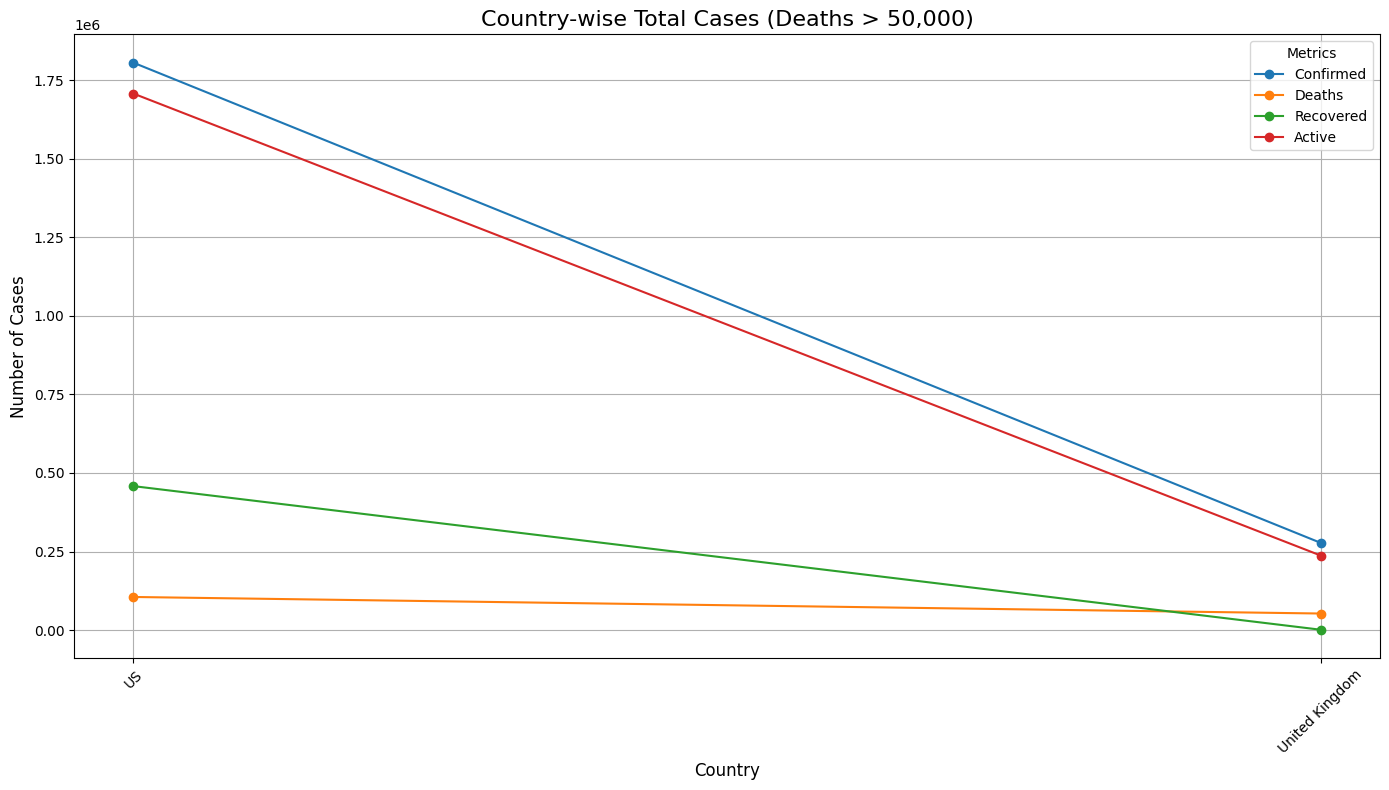

In [17]:
grouped_data = df.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()
filtered_data = grouped_data[grouped_data['Deaths'] > 50000]
# reset index for easier plotting
filtered_data = filtered_data.reset_index()

plt.figure(figsize=(14, 8))
for column in ['Confirmed', 'Deaths', 'Recovered', 'Active']:
    plt.plot(filtered_data['Country_Region'], filtered_data[column], marker='o', label=column)

plt.title('Country-wise Total Cases (Deaths > 50,000)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(ticks=range(len(filtered_data['Country_Region'])), labels=filtered_data['Country_Region'], rotation=45, fontsize=10)
plt.legend(title='Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()

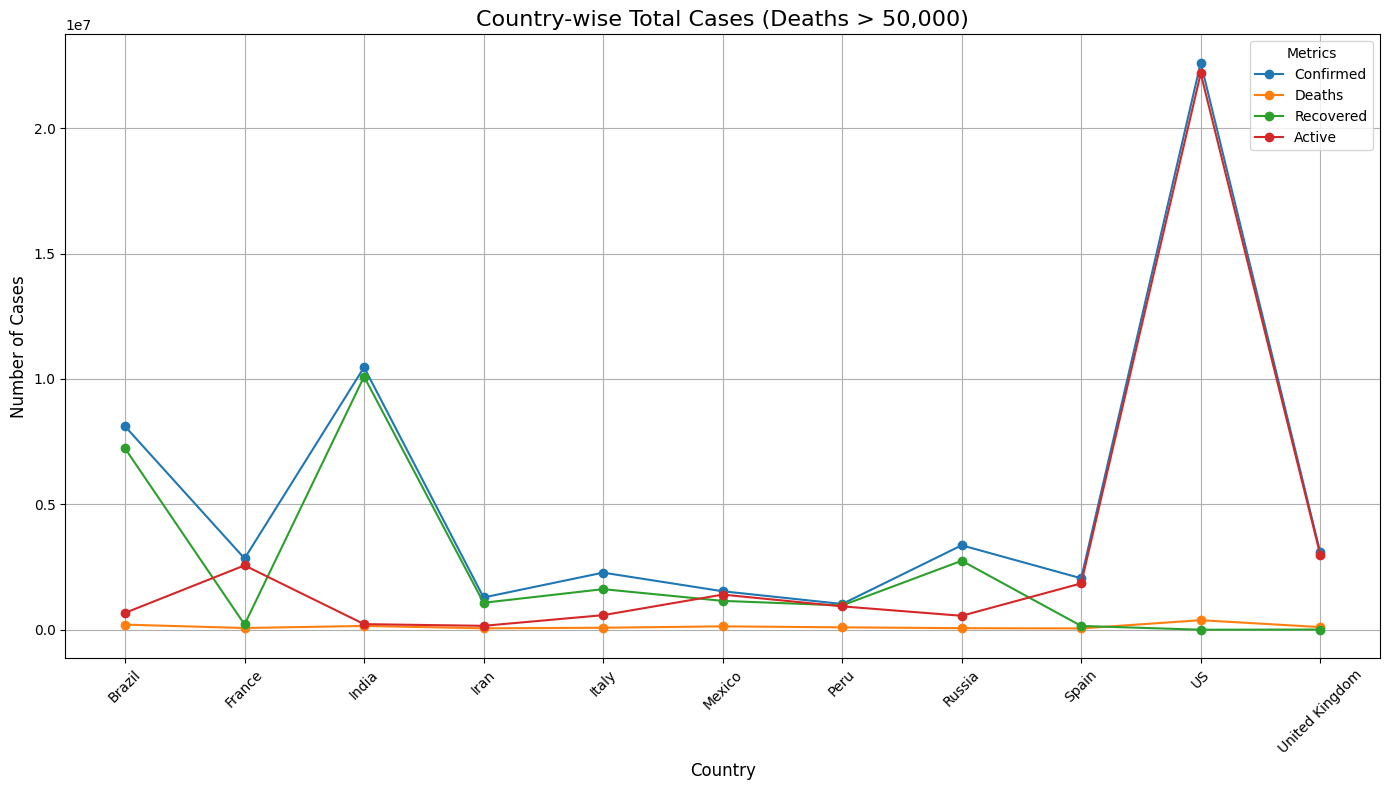

In [29]:
# the date that i choosed is only have UK so i used another date as well to check my answer
data = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_daily_reports/01-10-2021.csv')
grouped_data = data.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()
filtered_data = grouped_data[grouped_data['Deaths'] > 50000]
# reset index for easier plotting
filtered_data = filtered_data.reset_index()

plt.figure(figsize=(14, 8))
for column in ['Confirmed', 'Deaths', 'Recovered', 'Active']:
    plt.plot(filtered_data['Country_Region'], filtered_data[column], marker='o', label=column)

plt.title('Country-wise Total Cases (Deaths > 50,000)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(ticks=range(len(filtered_data['Country_Region'])), labels=filtered_data['Country_Region'], rotation=45, fontsize=10)
plt.legend(title='Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [19]:
import plotly.express as px

In [20]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [21]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [22]:
usa_data = covid_data[covid_data['Country_Region'] == 'US']
statewise_deaths = usa_data.groupby('Province_State')['Deaths'].sum().reset_index()

fig = px.bar(statewise_deaths,
             x='Province_State',
             y='Deaths',
             title='State-wise Deaths in the USA',
             labels={'Province_State': 'State/Province', 'Deaths': 'Number of Deaths'},
             text='Deaths')

fig.update_layout(xaxis_title='State/Province',
                  yaxis_title='Number of Deaths',
                  xaxis_tickangle=45,
                  width=1000,
                  height=600)

fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

In [23]:
usa_data = covid_data[covid_data['Country_Region'] == 'US']
statewise_active_cases = usa_data.groupby('Province_State')['Active'].sum().reset_index()

fig = px.bar(
    statewise_active_cases,
    x='Province_State',
    y='Active',
    title='State-wise Active Cases in the USA',
    labels={'Province_State': 'State/Province', 'Active': 'Number of Active Cases'},
    text='Active'
)

fig.update_layout(
    xaxis_title='State/Province',
    yaxis_title='Number of Active Cases',
    xaxis_tickangle=45,
    width=1000,
    height=600
)
fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [24]:
usa_data = covid_data[covid_data['Country_Region'] == 'US']
statewise_confirmed_cases = usa_data.groupby('Province_State')['Confirmed'].sum().reset_index()

fig = px.bar(
    statewise_confirmed_cases,
    x='Province_State',
    y='Confirmed',
    title='State-wise Confirmed Cases in the USA',
    labels={'Province_State': 'State/Province', 'Confirmed': 'Number of Confirmed Cases'},
    text='Confirmed'
)

fig.update_layout(
    xaxis_title='State/Province',
    yaxis_title='Number of Confirmed Cases',
    xaxis_tickangle=45,
    width=1000,
    height=600
)
fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [25]:
import plotly.express as px
import plotly.io as pio

In [26]:
covid_data['Last_Update'] = pd.to_datetime(covid_data['Last_Update'], errors='coerce')
worldwide_confirmed = covid_data.groupby(covid_data['Last_Update'].dt.date)['Confirmed'].sum().reset_index()
worldwide_confirmed.columns = ['Date', 'Confirmed']

fig = px.line(
    worldwide_confirmed,
    x='Date',
    y='Confirmed',
    title='Worldwide Confirmed Cases Over Time',
    labels={'Date': 'Date', 'Confirmed': 'Number of Confirmed Cases'},
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Confirmed Cases',
    width=1000,
    height=600
)
fig.show()

In [27]:
import plotly.express as px
import pandas as pd

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
time_series_data = pd.read_csv(url)

# reshape the data (from wide format to long format)
time_series_long = time_series_data.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Date',
    value_name='Confirmed'
)

time_series_long['Date'] = pd.to_datetime(time_series_long['Date'])
worldwide_confirmed = time_series_long.groupby('Date')['Confirmed'].sum().reset_index()

fig = px.line(
    worldwide_confirmed,
    x='Date',
    y='Confirmed',
    title='Worldwide Confirmed Cases Over Time',
    labels={'Date': 'Date', 'Confirmed': 'Number of Confirmed Cases'}
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Confirmed Cases',
    width=1000,
    height=600
)
fig.show()


<ipython-input-27-c19821f2cd6c>:14: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

